In [1]:

import numpy as np
import matplotlib.pyplot as plt
import helpers as hp
from pathlib import Path
from config import PathConfigs
import os
import pandas as pd

from scipy.stats import entropy

%matplotlib widget


In [2]:
string = "test_var"
globals()[string] = 42

# thats cool, didnt know you could dynamically declare variables
test_var

42

In [3]:
Delta = 0.5
mu = 1.0
V_c = np.sqrt(mu**2 + Delta ** 2)

V_c

1.118033988749895

In [4]:

save_plots = True

dirname = "reruncorr_stong_dis_test"
save_dir = Path(PathConfigs.DATA/dirname/"Plots")

os.makedirs(save_dir, exist_ok=True)





In [5]:

barrier_left_conductance_left_arr = hp.np_load_wrapped("barrier_left_conductance_left_arr", dirname)
barrier_right_conductance_right_arr = hp.np_load_wrapped("barrier_right_conductance_right_arr", dirname)
barrier_left_conductance_right_arr = hp.np_load_wrapped("barrier_left_conductance_right_arr", dirname)
barrier_right_conductance_left_arr = hp.np_load_wrapped("barrier_right_conductance_left_arr", dirname)
dIdVs_left_arr = hp.np_load_wrapped("dIdVs_left_arr", dirname)
dIdVs_right_arr = hp.np_load_wrapped("dIdVs_right_arr", dirname)
energies = hp.np_load_wrapped("energies", dirname)
pdi_arr = hp.np_load_wrapped("pdi_data", dirname)
Conductance_matrix = hp.np_load_wrapped("Conductance_matrix", dirname)
gamma_sq_arr = hp.np_load_wrapped("gamma_sq_arr", dirname)
mp_arr = hp.np_load_wrapped("mp_arr", dirname)
rG_corr = hp.np_load_wrapped("rG_corr", dirname)
params_list = hp.np_load_wrapped("params_list", dirname)


#ldos = hp.np_load_wrapped("LDOS", dirname)

#return [mu_pm * V_c, vz_raw, pdi_val]
#new_pdi_dat = np.asarray([[pdr[0]/V_c, pdr[1]*V_c, pdr[2]] for pdr in pdi_arr])


params_list

array([[0.000e+00, 5.000e-01, 6.000e-01],
       [1.000e+00, 5.000e-01, 6.200e-01],
       [2.000e+00, 5.000e-01, 6.400e-01],
       ...,
       [2.598e+03, 1.500e+00, 1.560e+00],
       [2.599e+03, 1.500e+00, 1.580e+00],
       [2.600e+03, 1.500e+00, 1.600e+00]])

In [6]:
def filter_pdi(pdis):
    for i in range(len(pdis)):
        pdi = pdis[i]
        if pdi > 1:
            pdis[i] = 1.00
        elif pdi < 0.0:
            pdis[i] = 0
            
    return pdis
    

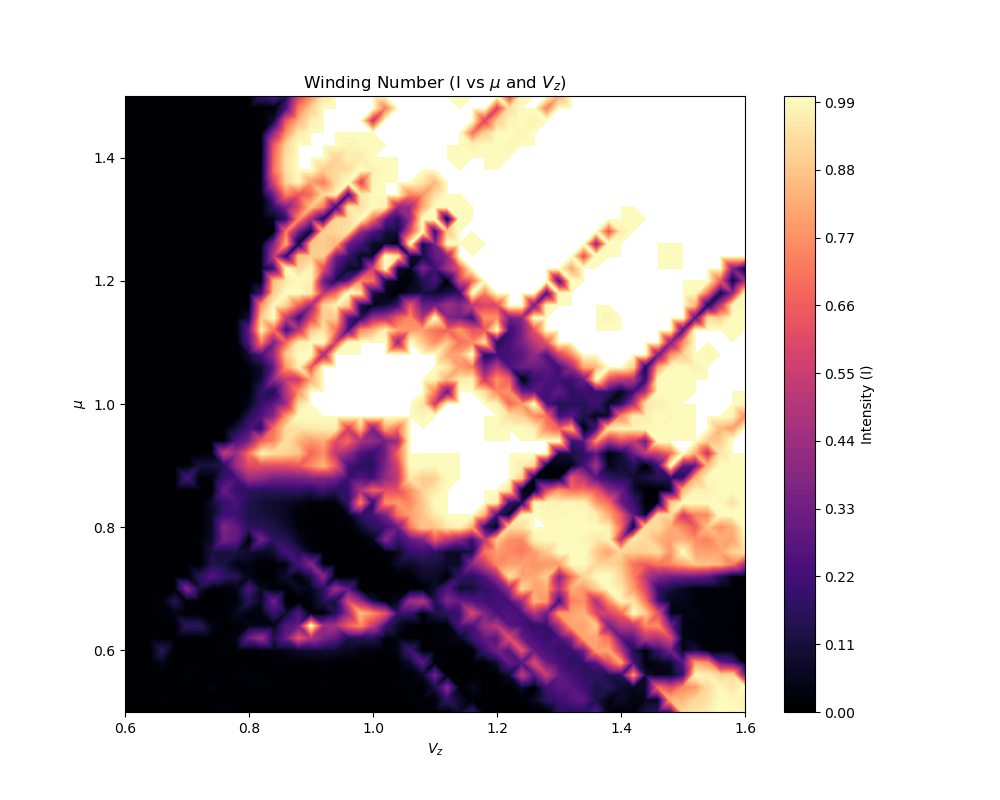

In [7]:
import numpy as np
import matplotlib.pyplot as plt

mu =  pdi_arr[:, 0]  # x-axis
V_z = pdi_arr[:, 1] # y-axis
I =   filter_pdi(pdi_arr[:, 2])  # z-axis (color) ## pdi_arr has the actual zeeman field values as opposed to V_z/V_c
#I =   pdi_arr[:, 2]  # z-axis (color)

# 3. Create the heatmap
plt.figure(figsize=(10, 8))

# tricontourf creates a smooth filled contour plot
# levels=100 makes it look like a continuous heatmap
contour = plt.tricontourf(V_z, mu, I, levels=100, cmap='magma')

# Add a colorbar to show what I values the colors represent
cbar = plt.colorbar(contour)
cbar.set_label('Intensity (I)')

# 4. Label axes
plt.ylabel(r'$\mu$')
plt.xlabel(r'$V_z$')
plt.title('Winding Number (I vs $\mu$ and $V_z$)')

plt.show()

In [8]:
def symmetric_normalized_KL_Div(p,q):
    symmKL = 0.5*(entropy(p,q) + entropy(q,p))

In [23]:
symm_KL = lambda p, q: 0.5*(entropy(p,q) + entropy(q,p))

#corrs = np.asarray([1 - symm_KL(barrier_left_conductance_left_arr[i,:], barrier_left_conductance_right_arr[i,:]) for i in range(barrier_left_conductance_right_arr.shape[0])])
#corrs = corrs - corrs.min()
#corrs = corrs/corrs.max()
#corrs = np.asarray([0.0 if corr < 0.95 else corr for corr in corrs])

corrs = np.asarray([hp.calc_invariant_metric(barrier_left_conductance_left_arr[i,:], barrier_left_conductance_right_arr[i,:]) for i in range(barrier_left_conductance_right_arr.shape[0])])
#corrs = np.asarray([1.0 if corr > 1 else corr for corr in corrs])
#corrs = np.asarray([0.0 if corr < 0.0 else corr for corr in corrs])


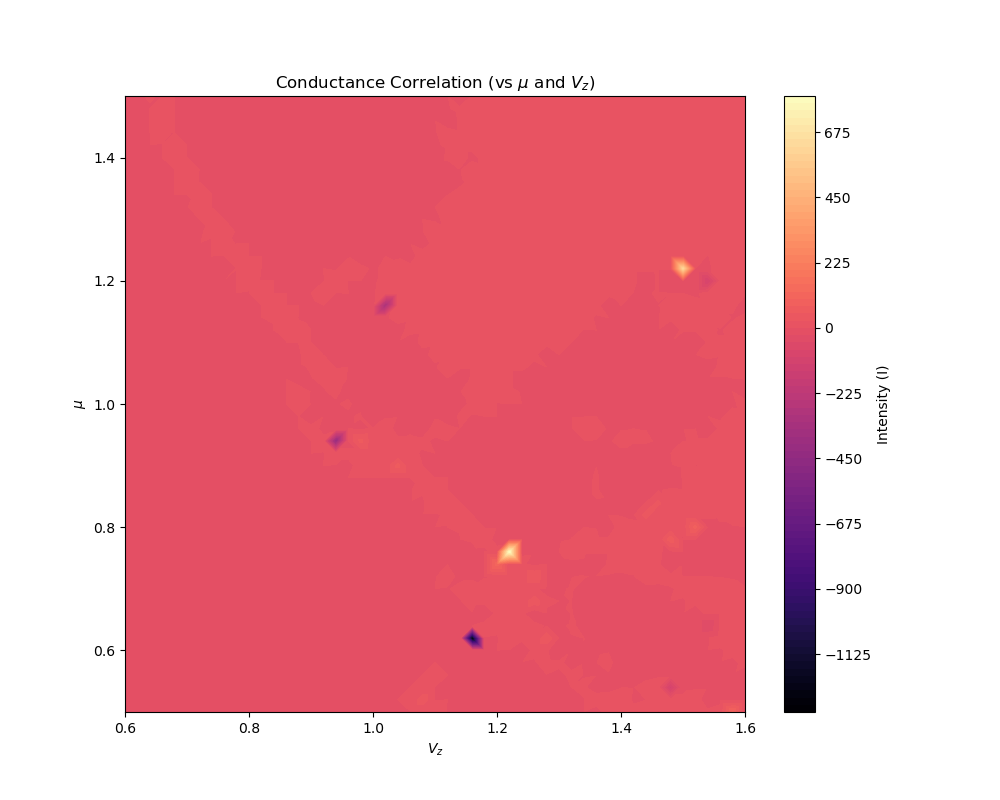

In [24]:
import numpy as np
import matplotlib.pyplot as plt

mu  =  params_list[:, 1]  # x-axis
V_z =  params_list[:, 2]  # y-axis
#V_z =  pdi_arr[:, 1]  # y-axis
zplot   =  corrs  #filter_pdi(pdi_arr[:, 2])  # z-axis (color)


# 3. Create the heatmap
plt.figure(figsize=(10, 8))

# tricontourf creates a smooth filled contour plot
# levels=100 makes it look like a continuous heatmap
contour = plt.tricontourf(V_z, mu, zplot, levels=100, cmap='magma')

# Add a colorbar to show what I values the colors represent
cbar = plt.colorbar(contour)
cbar.set_label('Intensity (I)')

# 4. Label axes
plt.ylabel(r'$\mu$')
plt.xlabel(r'$V_z$')
plt.title('Conductance Correlation (vs $\mu$ and $V_z$)')

plt.show()

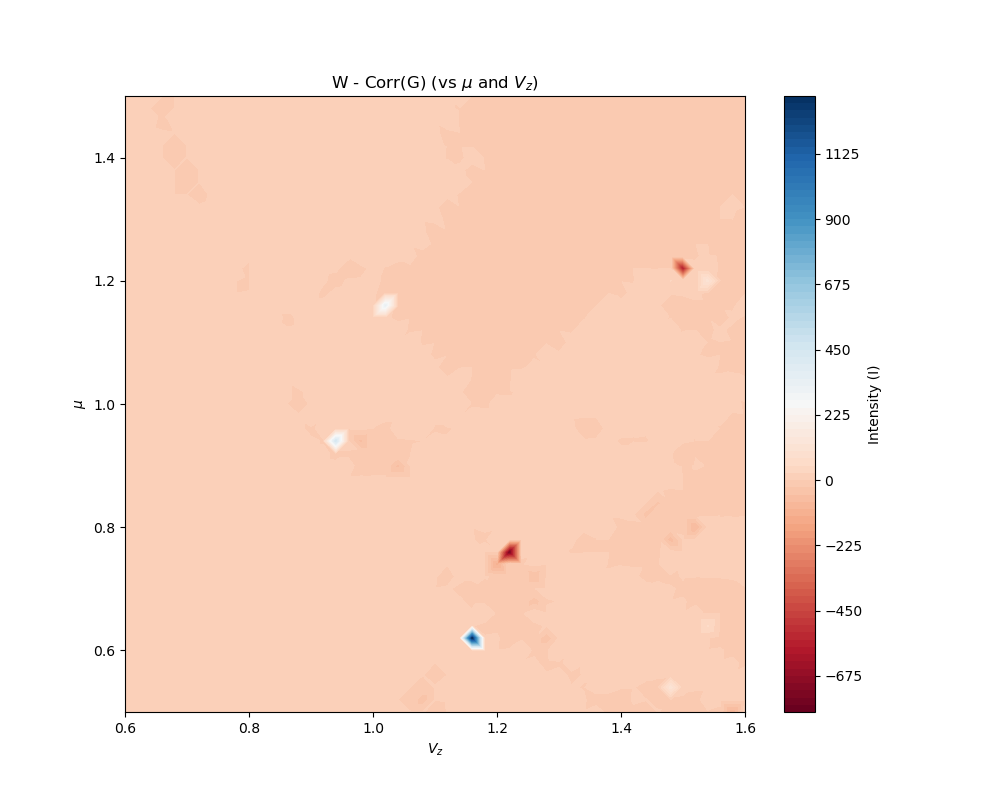

Max positive Difference: diff: [1318.22225875]| mu: [0.62]| Vz: [1.16]
Max negative Difference: diff: [-789.58079211]| mu: [0.76]| Vz: [1.22]


In [26]:

import numpy as np
import matplotlib.pyplot as plt

mu  =  params_list[:, 1]  # x-axis
V_z =  params_list[:, 2]  # y-axis
#diff = I/I.max() - rG_corr/rG_corr.max()
#diff = np.abs(I - rG_corr)
diff = I - corrs


# 3. Create the heatmap
plt.figure(figsize=(10, 8))

# tricontourf creates a smooth filled contour plot
# levels=100 makes it look like a continuous heatmap
contour = plt.tricontourf(V_z, mu, diff, levels=100, cmap='RdBu')

# Add a colorbar to show what I values the colors represent
cbar = plt.colorbar(contour)
cbar.set_label('Intensity (I)')

# 4. Label axes
plt.ylabel(r'$\mu$')
plt.xlabel(r'$V_z$')
plt.title('W - Corr(G) (vs $\mu$ and $V_z$)')

plt.show()
iiidx=4
max_pos_diff_idx = np.where(diff == diff.max())
max_pos_diff = diff[max_pos_diff_idx]   #[iiidx]
max_pos_diff_mu = mu[max_pos_diff_idx]  #[iiidx]
max_pos_diff_Vz = V_z[max_pos_diff_idx] #[iiidx]

max_neg_diff_idx = np.where(diff == diff.min())
max_neg_diff = diff[max_neg_diff_idx]   #[iiidx]
max_neg_diff_mu = mu[max_neg_diff_idx]  #[iiidx]
max_neg_diff_Vz = V_z[max_neg_diff_idx] #[iiidx]

print(f"Max positive Difference: diff: {max_pos_diff}| mu: {max_pos_diff_mu}| Vz: {max_pos_diff_Vz}")
print(f"Max negative Difference: diff: {max_neg_diff}| mu: {max_neg_diff_mu}| Vz: {max_neg_diff_Vz}")



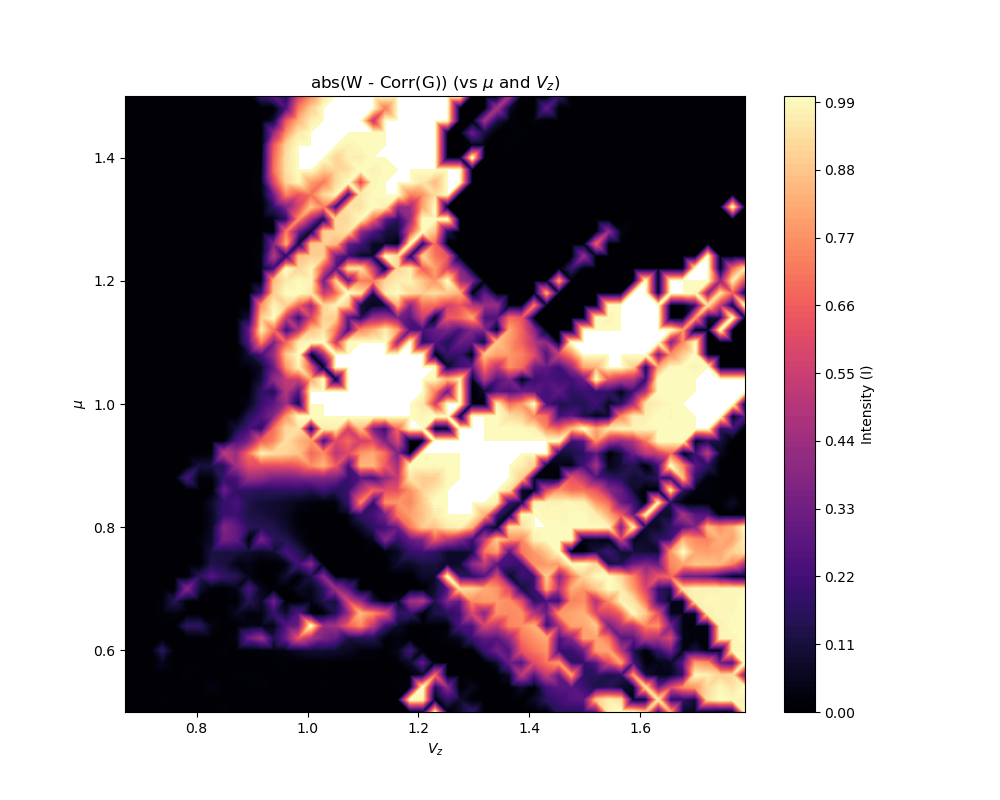

In [12]:
import numpy as np
import matplotlib.pyplot as plt

mu  =  params_list[:, 1]  # x-axis
V_z =  params_list[:, 2]*V_c  # y-axis
#diff = I/I.max() - rG_corr/rG_corr.max()
diff = np.abs(I - corrs)


# 3. Create the heatmap
plt.figure(figsize=(10, 8))

# tricontourf creates a smooth filled contour plot
# levels=100 makes it look like a continuous heatmap
contour = plt.tricontourf(V_z, mu, diff, levels=100, cmap='magma')

# Add a colorbar to show what I values the colors represent
cbar = plt.colorbar(contour)
cbar.set_label('Intensity (I)')

# 4. Label axes
plt.ylabel(r'$\mu$')
plt.xlabel(r'$V_z$')
plt.title('abs(W - Corr(G)) (vs $\mu$ and $V_z$)')

plt.show()

In [13]:
data = {
    'mu': pdi_arr[:, 0],
    'V_z':pdi_arr[:, 1],
    'I': filter_pdi(pdi_arr[:, 2])
}

df = pd.DataFrame(data = data)

minval = np.min(np.abs(pdi_arr[:, 0] - mu))

val = minval + mu

mudf = df[np.isclose(df['mu'], val,rtol = 1e-6) ]


plt.plot(mudf['V_z']/V_c, mudf['I'])


In [14]:
mu = 1
Delta = 0.5
V_c = np.sqrt(mu**2 + Delta**2)
num_vz_var = mp_arr.shape[0]
Vz_var = np.linspace(0.3, 1.7, num_vz_var) 
Vzs = Vz_var


len dIdVs_left_arr: (2601, 101)
len Vzs: 2601
len energies: 101


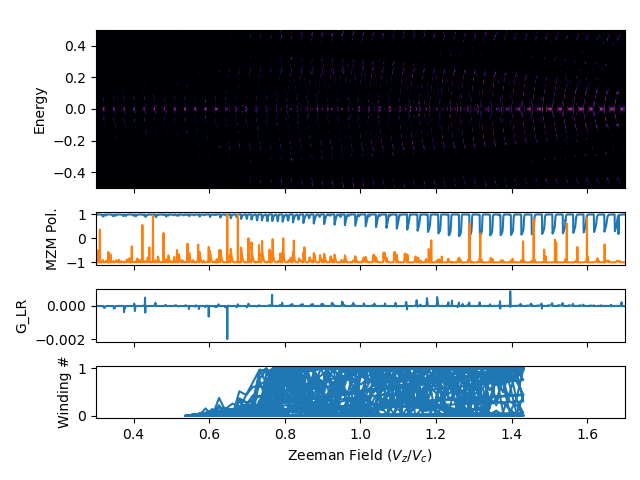

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# ... (Previous data generation code: energies, Vz_var, dIdVs_left_arr, etc.) ...

print(f"len dIdVs_left_arr: {dIdVs_left_arr.shape}")
print(f"len Vzs: {len(Vz_var)}")  # Adjusted variable name based on your meshgrid usage
print(f"len energies: {len(energies)}")

# Prepare Grid
Y, X = np.meshgrid(energies, Vz_var)
Z = dIdVs_left_arr

# Update: 3 rows, height ratios [3, 1, 1] to make ax2 and ax3 equal size
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1, 1, 1]})

# --- Plot 1: Heatmap ---
mesh = ax1.pcolormesh(X, Y, Z, cmap='magma', shading='gouraud')
ax1.set_ylabel("Energy") 

# --- Plot 2: MZM Polarization (Top Line Plot) ---
ax2.plot(Vz_var, mp_arr[:, 0])
ax2.plot(Vz_var, mp_arr[:, -1])
ax2.set_ylabel("MZM Pol.")
#ax2.legend() # Optional: added legend since there are two lines

# --- Plot 3: New Graph (Bottom Line Plot) ---
# Replace 'your_y_data' with the data you wish to plot here
ax3.plot(Vz_var, Conductance_matrix[:,0,1]) 
ax3.set_ylabel("G_LR") 

ax4.plot(mudf['V_z']/V_c, mudf['I'])
ax4.set_ylabel("Winding #") 
ax4.set_xlabel(r"Zeeman Field $(V_z/V_c)$") # x-label goes on the bottom-most plot

fig.suptitle(r"")
fig.tight_layout()

plt.show()

In [16]:
def calc_invariant_metric(f1, f2):
    smdiff = np.sum(f1-f2)
    sgn = smdiff/np.abs(smdiff)
    fmax = f2 if sgn < 0 else f1
    fmin = f2 if sgn > 0 else f1
    
    invA = 1/np.sum(fmax)
    
    fn_max = fmax * invA
    fn_min = fmin/np.sum(fmin)
    
    corr = (np.dot(fn_max, fn_min) - invA)/(np.dot(fn_min, fn_min) - invA) 
    
    return corr
    
    
    
    

In [17]:
i = 47
GLL = barrier_left_conductance_left_arr[i,:]
GRR = barrier_left_conductance_right_arr[i,:]

nGRR = GRR/np.max(GRR)
nGLL = GLL/np.max(GLL)

print(hp.calc_invariant_metric(nGRR, nGLL))
plt.plot(nGRR)
plt.plot(nGLL)

2.7712266484721813


In [18]:
d = {'a':1, 'b':2}

vls = list(d.values())

[3,4, *vls]

[3, 4, 1, 2]

In [19]:
import numpy as np
import matplotlib.pyplot as plt
rng = 1
beta1 = 20
mu1 = 0.3
mu2 = 0.31
numpts = 10000
x = np.linspace(0,rng, numpts)

f = lambda x, beta, mu: 1/(np.exp(beta * (x - mu)) + 1)

f1 = f(x, beta1, mu1) + 0.1
f2 = f(x, beta1, mu2)
smdiff = np.sum(f1-f2)
sgn = smdiff/np.abs(smdiff)
print(f"SUM-DIFF: {np.sum(f2-f1)}")

plt.plot(f1, label = 'f1')
plt.plot(f2, label = 'f2')

plt.legend()

msg = 'f2' if sgn < 0 else 'f1'
print(f"The majorizing function is: {msg}")
invm = calc_invariant_metric(f1, f2)
print(f"The metric is: {invm}")




SUM-DIFF: -900.2340014642995
The majorizing function is: f1
The metric is: -0.9368047283322225


In [20]:


print(f"f1 Sum: {np.sum(f1)}")
print(f"f2 Sum: {np.sum(f2)}")

fn1 = f1/np.sum(f1)
fn2 = f2/np.sum(f2)
invA = 1/np.sum(f2)
corr = (np.dot(fn1, fn2) - invA)/(np.dot(fn1, fn1) - invA) 

plt.plot(x, fn1, label="fn1")
plt.plot(x, fn2, label="fn2")

plt.legend()



corr

    
    

f1 Sum: 4001.4360675771704
f2 Sum: 3101.2020661128718


0.7507989775543661